In [268]:
!pip install cufflinks

You should consider upgrading via the 'c:\users\chamb\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

import plotly
import plotly.express as px
import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot

import cufflinks as cf
from sklearn.metrics import accuracy_score

In [3]:
pyo.init_notebook_mode(connected=True)
cf.go_offline()

In [4]:
! pip install xlrd

You should consider upgrading via the 'c:\users\chamb\appdata\local\programs\python\python38\python.exe -m pip install --upgrade pip' command.


In [5]:
df=pd.read_excel(r'D:\ml\Data\heart.xls') #trouble with reading csv file .. so took xls

In [273]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [274]:
info = ["age","1: male, 0: female","chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic","resting blood pressure"," serum cholestoral in mg/dl","fasting blood sugar > 120 mg/dl","resting electrocardiographic results (values 0,1,2)"," maximum heart rate achieved","exercise induced angina","oldpeak = ST depression induced by exercise relative to rest","the slope of the peak exercise ST segment","number of major vessels (0-3) colored by flourosopy","thal: 3 = normal; 6 = fixed defect; 7 = reversable defect"]

for i in range(len(info)):
    print(df.columns[i]+":\t"+info[i])

age:	age
sex:	1: male, 0: female
cp:	chest pain type, 1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic
trestbps:	resting blood pressure
chol:	 serum cholestoral in mg/dl
fbs:	fasting blood sugar > 120 mg/dl
restecg:	resting electrocardiographic results (values 0,1,2)
thalach:	 maximum heart rate achieved
exang:	exercise induced angina
oldpeak:	oldpeak = ST depression induced by exercise relative to rest
slope:	the slope of the peak exercise ST segment
ca:	number of major vessels (0-3) colored by flourosopy
thal:	thal: 3 = normal; 6 = fixed defect; 7 = reversable defect


In [275]:
df['target']

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [276]:
df.groupby('target').size()

target
0    138
1    165
dtype: int64

In [277]:
df.shape

(303, 14)

In [278]:
df.size

4242

In [279]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [280]:
df.info() #check whether all cells contain some data like anyb cell is empty

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [281]:
#visualization

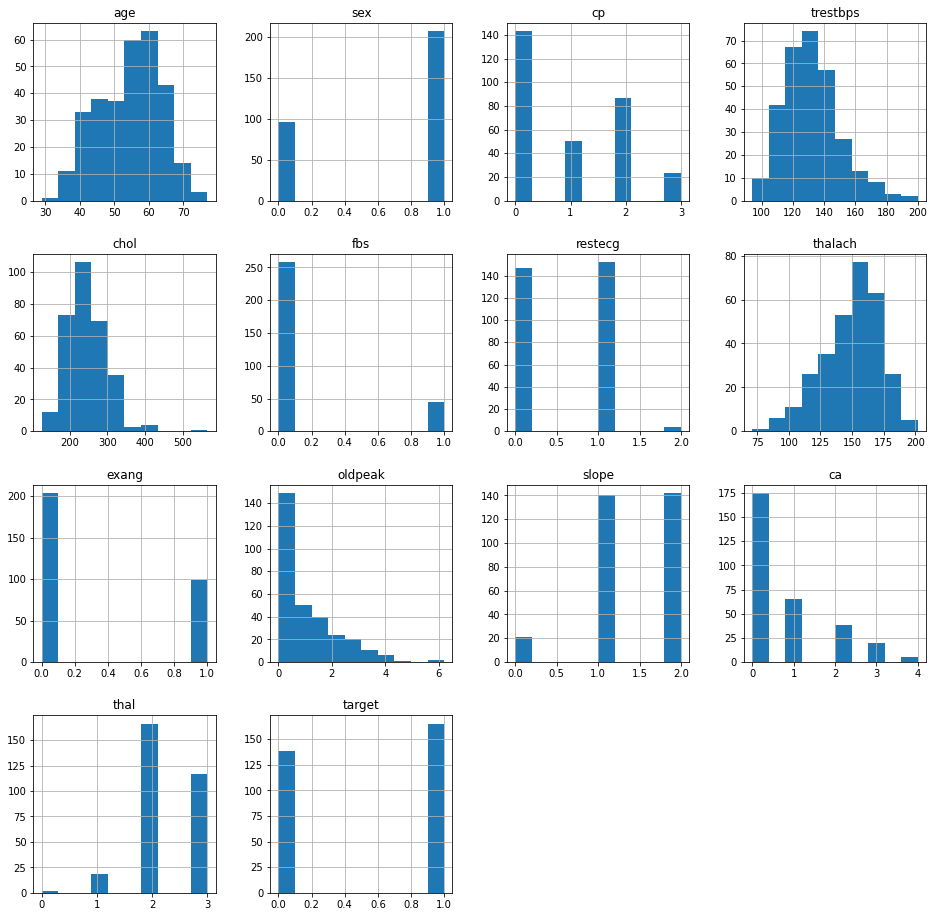

In [282]:
df.hist(figsize=(16,16))
plt.show()

c:\users\chamb\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



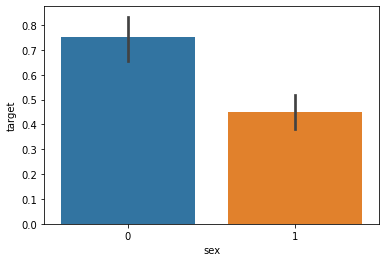

In [283]:
sns.barplot(df['sex'],df['target'])
plt.show()

c:\users\chamb\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



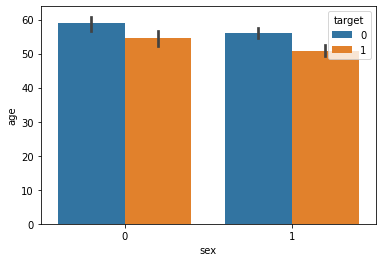

In [284]:
sns.barplot(df['sex'],df['age'],hue=df['target'])
plt.show()

In [285]:
px.bar(df,df['sex'],df['target']) #plotly

In [286]:
numeric_column=['trestbps','chol','age','oldpeak','thalach']

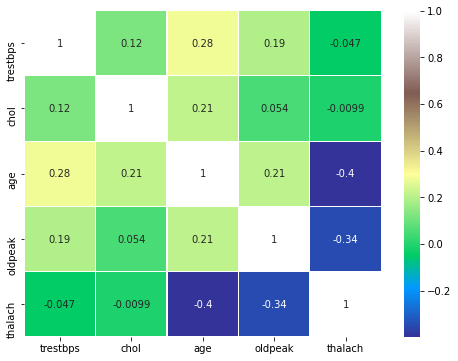

In [287]:
sns.heatmap(df[numeric_column].corr(),annot=True,cmap='terrain',linewidth=0.1)
fig=plt.gcf()
fig.set_size_inches(8,6)
plt.show()

c:\users\chamb\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

c:\users\chamb\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

c:\users\chamb\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `hi

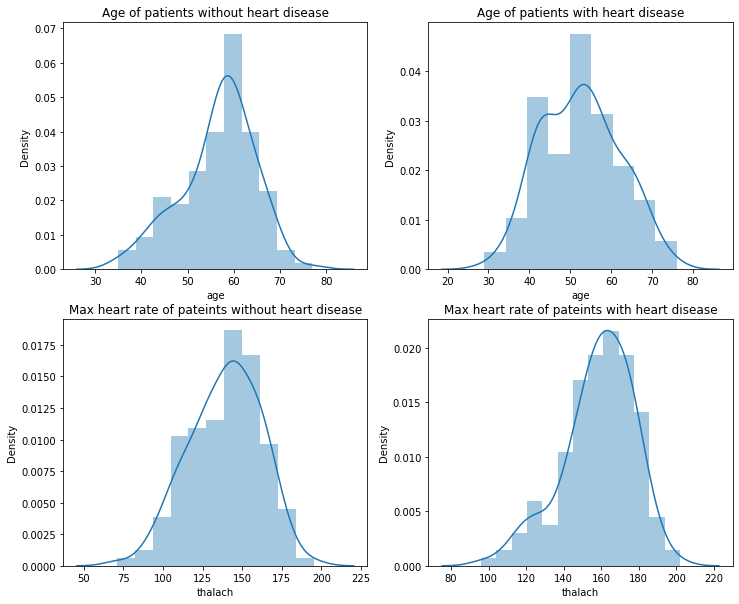

In [288]:
plt.figure(figsize=(12,10))
plt.subplot(221)
sns.distplot(df[df['target']==0].age)
plt.title('Age of patients without heart disease')

plt.subplot(222)
sns.distplot(df[df['target']==1].age)
plt.title('Age of patients with heart disease')

plt.subplot(223)
sns.distplot(df[df['target']==0].thalach)
plt.title('Max heart rate of pateints without heart disease')

plt.subplot(224)
sns.distplot(df[df['target']==1].thalach)
plt.title('Max heart rate of pateints with heart disease')
plt.show()

In [289]:
#3rd step data preprocessing

In [290]:
x,y=df.loc[:,:'thal'],df['target']

In [291]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [292]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [293]:
x.shape

(303, 13)

In [294]:
x.size

3939

In [295]:
#dividing data into training data and test data

In [296]:
#70% train 30% test

In [297]:
from sklearn.model_selection import train_test_split

In [298]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=10,test_size=0.3,shuffle=True)

In [299]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
49,53,0,0,138,234,0,0,160,0,0.0,2,0,2
171,48,1,1,110,229,0,1,168,0,1.0,0,0,3
223,56,0,0,200,288,1,0,133,1,4.0,0,2,3
58,34,1,3,118,182,0,0,174,0,0.0,2,0,2
154,39,0,2,138,220,0,1,152,0,0.0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,47,1,2,130,253,0,1,179,0,0.0,2,0,2
123,54,0,2,108,267,0,0,167,0,0.0,2,0,2
15,50,0,2,120,219,0,1,158,0,1.6,1,0,2
125,34,0,1,118,210,0,1,192,0,0.7,2,0,2


In [300]:
x_train.shape

(212, 13)

In [301]:
x.shape

(303, 13)

In [302]:
x.size

3939

In [303]:
x_train.size

2756

In [304]:
y_train

49     1
171    0
223    0
58     1
154    1
      ..
156    1
123    1
15     1
125    1
265    0
Name: target, Length: 212, dtype: int64

In [305]:
#prediction

In [306]:
#decision tree classifier

In [307]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier(max_depth=4)
dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [308]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
183,58,1,2,112,230,0,0,165,0,2.5,1,1,3
229,64,1,2,125,309,0,1,131,1,1.8,1,0,3
126,47,1,0,112,204,0,1,143,0,0.1,2,0,2
184,50,1,0,150,243,0,0,128,0,2.6,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,62,0,0,124,209,0,1,163,0,0.0,2,0,2
21,44,1,2,130,233,0,1,179,1,0.4,2,0,2
210,57,1,2,128,229,0,0,150,0,0.4,1,1,3
78,52,1,1,128,205,1,1,184,0,0.0,2,0,2


In [309]:
prediction=dt.predict(x_test)

In [310]:
prediction

array([0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 0], dtype=int64)

In [311]:
y_test

246    0
183    0
229    0
126    1
184    0
      ..
69     1
21     1
210    0
78     1
174    0
Name: target, Length: 91, dtype: int64

In [312]:
accuracy_dt=accuracy_score(y_test,prediction)

In [313]:
accuracy_dt*100

74.72527472527473

In [314]:
#feature importance... which feature is more imp to predict heart attack

In [315]:
dt.feature_importances_

array([0.03176386, 0.04099736, 0.46810558, 0.04760686, 0.06863079,
       0.        , 0.        , 0.04266019, 0.06828117, 0.        ,
       0.06146885, 0.15860714, 0.0118782 ])

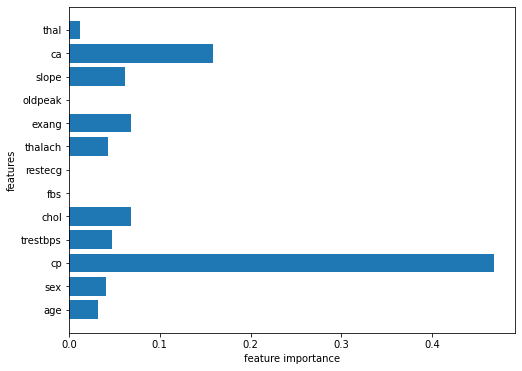

In [316]:
def plot_feature_importance(model):
    plt.figure(figsize=(8,6))
    n_fetures=13
    plt.barh(range(n_fetures),model.feature_importances_,align='center')
    plt.yticks(np.arange(n_fetures),x)
    plt.xlabel("feature importance")
    plt.ylabel("features")
    plt.ylim(-1,n_fetures)

plot_feature_importance(dt)

In [321]:
y_test

246    0
183    0
229    0
126    1
184    0
      ..
69     1
21     1
210    0
78     1
174    0
Name: target, Length: 91, dtype: int64

In [322]:
x_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
183,58,1,2,112,230,0,0,165,0,2.5,1,1,3
229,64,1,2,125,309,0,1,131,1,1.8,1,0,3
126,47,1,0,112,204,0,1,143,0,0.1,2,0,2
184,50,1,0,150,243,0,0,128,0,2.6,1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
69,62,0,0,124,209,0,1,163,0,0.0,2,0,2
21,44,1,2,130,233,0,1,179,1,0.4,2,0,2
210,57,1,2,128,229,0,0,150,0,0.4,1,1,3
78,52,1,1,128,205,1,1,184,0,0.0,2,0,2


In [323]:
custom_data=np.array([[63,1,3,145,233,1,0,150,0,2.3,0,0,1]])

In [326]:
custom_data_prediction=dt.predict(custom_data)

In [327]:
custom_data_prediction

array([1], dtype=int64)

In [328]:
#knn

In [369]:
from sklearn.preprocessing import StandardScaler

std=StandardScaler().fit(x)
x_std=std.transform(x)

In [371]:
x_train_std,x_test_std,y_train_std,y_test_std=train_test_split(x_std,y,random_state=10,test_size=0.3,shuffle=True)

In [372]:
x_train_std

array([[-0.15069166, -1.46841752, -0.93851463, ...,  0.97635214,
        -0.71442887, -0.51292188],
       [-0.7021358 ,  0.68100522,  0.03203122, ..., -2.27457861,
        -0.71442887,  1.12302895],
       [ 0.18017482, -1.46841752, -0.93851463, ..., -2.27457861,
         1.24459328,  1.12302895],
       ...,
       [-0.48155814, -1.46841752,  1.00257707, ..., -0.64911323,
        -0.71442887, -0.51292188],
       [-2.24617937, -1.46841752,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188],
       [ 1.28306308,  0.68100522, -0.93851463, ...,  0.97635214,
         0.26508221, -0.51292188]])

In [329]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
49,53,0,0,138,234,0,0,160,0,0.0,2,0,2
171,48,1,1,110,229,0,1,168,0,1.0,0,0,3
223,56,0,0,200,288,1,0,133,1,4.0,0,2,3
58,34,1,3,118,182,0,0,174,0,0.0,2,0,2
154,39,0,2,138,220,0,1,152,0,0.0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
156,47,1,2,130,253,0,1,179,0,0.0,2,0,2
123,54,0,2,108,267,0,0,167,0,0.0,2,0,2
15,50,0,2,120,219,0,1,158,0,1.6,1,0,2
125,34,0,1,118,210,0,1,192,0,0.7,2,0,2


In [405]:
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=4)
knn.fit(x_train_std,y_train_std)

KNeighborsClassifier(n_neighbors=4)

In [406]:
prediction_knn=knn.predict(x_test_std)

In [407]:
prediction_knn

array([0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 0], dtype=int64)

In [408]:
accuracy_knn=accuracy_score(y_test_std,prediction_knn)

In [409]:
accuracy_knn

0.8571428571428571

In [381]:
custom_data_knn=np.array([[63,1,3,145,233,0,150,0,2.3,0,0,1]])

In [382]:
custom_data_predict_knn=knn.predict(custom_data)

In [383]:
custom_data_predict_knn

array([1], dtype=int64)

In [399]:
k_range=range(1,26)
scores={}
scores_list=[]

for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train_std,y_train_std)
    prediction_knn=knn.predict(x_test_std)
    scores[k]=accuracy_score(y_test,prediction_knn)
    scores_list.append(accuracy_score(y_test,prediction_knn))

In [400]:
scores

{1: 0.7582417582417582,
 2: 0.8131868131868132,
 3: 0.8241758241758241,
 4: 0.8571428571428571,
 5: 0.8131868131868132,
 6: 0.8021978021978022,
 7: 0.8021978021978022,
 8: 0.8241758241758241,
 9: 0.7802197802197802,
 10: 0.7802197802197802,
 11: 0.7802197802197802,
 12: 0.7912087912087912,
 13: 0.8021978021978022,
 14: 0.8021978021978022,
 15: 0.7802197802197802,
 16: 0.7802197802197802,
 17: 0.7802197802197802,
 18: 0.7802197802197802,
 19: 0.7802197802197802,
 20: 0.7802197802197802,
 21: 0.7802197802197802,
 22: 0.7912087912087912,
 23: 0.7802197802197802,
 24: 0.7802197802197802,
 25: 0.7802197802197802}

In [402]:
scores_list

[0.7582417582417582,
 0.8131868131868132,
 0.8241758241758241,
 0.8571428571428571,
 0.8131868131868132,
 0.8021978021978022,
 0.8021978021978022,
 0.8241758241758241,
 0.7802197802197802,
 0.7802197802197802,
 0.7802197802197802,
 0.7912087912087912,
 0.8021978021978022,
 0.8021978021978022,
 0.7802197802197802,
 0.7802197802197802,
 0.7802197802197802,
 0.7802197802197802,
 0.7802197802197802,
 0.7802197802197802,
 0.7802197802197802,
 0.7912087912087912,
 0.7802197802197802,
 0.7802197802197802,
 0.7802197802197802]

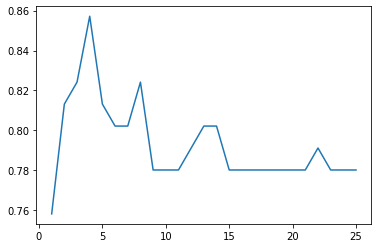

In [403]:
plt.plot(k_range,scores_list)

In [404]:
px.line(x=k_range,y=scores_list)

In [410]:
algorithms=['Decision Tree','KNN']
scores=[accuracy_dt,accuracy_knn]

c:\users\chamb\appdata\local\programs\python\python38\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:>

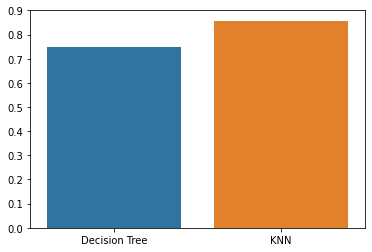

In [411]:
sns.barplot(algorithms,scores)